# Semantic Segmentation

In this project I train a Fully Convolutional Network (FCN) to classify each pixel of an image as **road** or **no road**.

I use  **KITTI Dataset** available in http://www.cvlibs.net/datasets/kitti/eval_road.php

The dataset consists of 289 training and 290 test images. It contains three different categories of road scenes:

- uu - urban unmarked (98/100)
- um - urban marked (95/96)
- umm - urban multiple marked lanes (96/94)
- urban - combination of the three above

Ground truth has been generated by manual annotation of the images and is available for two different road terrain types: 

- road - the road area, i.e, the composition of all lanes, and 
- lane - the ego-lane, i.e., the lane the vehicle is currently driving on (only available for category "um"). 

Ground truth is provided for training images only.

The original paper that made available the **KITTI Dataset** by _Jannik Fritsch et al._ can be found at http://www.cvlibs.net/publications/Fritsch2013ITSC.pdf

The FCN was based on the paper by _Jonathan Long et al._ https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import scipy.misc
from moviepy.editor import VideoFileClip

%matplotlib inline

In [3]:
def show_image(img, title):
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [4]:
def only_road(img):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
    r1 = 255
    r2 = 0
    
    red = img[:, :, 0]
    mask = (red == r1)
    img[:, :, 0][mask] = r2
    return img

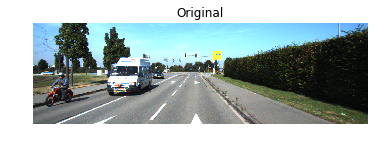

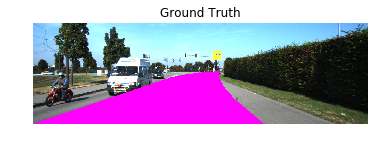

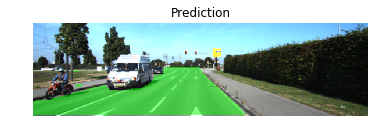

In [5]:
img = cv2.imread('data/data_road/testing/image_2/umm_000041.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

label = cv2.imread('data/data_road/training/gt_image_2/umm_road_000041.png')
label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(gray, 76, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(img, img, mask = mask_inv)
# label = only_road(label)
img2_bg = cv2.bitwise_and(label, label, mask = mask)

img_overlay = cv2.add(img1_bg, img2_bg)

prediction = cv2.imread('runs/1505138287.9522767/umm_000041.png')
prediction = cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)

show_image(img, 'Original')
show_image(img_overlay, 'Ground Truth')
show_image(prediction, 'Prediction')

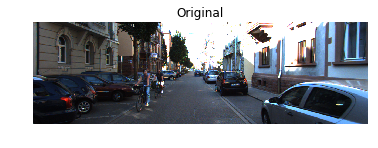

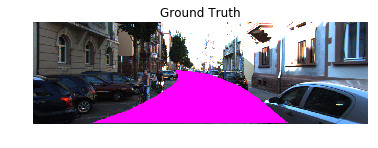

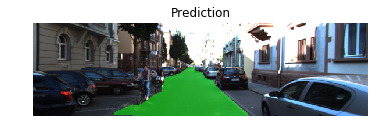

In [6]:
img = cv2.imread('data/data_road/testing/image_2/uu_000093.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

label = cv2.imread('data/data_road/training/gt_image_2/uu_road_000093.png')
label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(gray, 76, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(img, img, mask = mask_inv)
# label = only_road(label)
img2_bg = cv2.bitwise_and(label, label, mask = mask)

img_overlay = cv2.add(img1_bg, img2_bg)

prediction = cv2.imread('runs/1505138287.9522767/uu_000093.png')
prediction = cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)

show_image(img, 'Original')
show_image(img_overlay, 'Ground Truth')
show_image(prediction, 'Prediction')

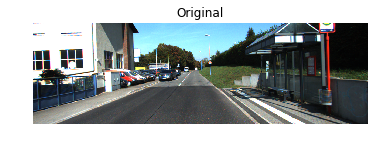

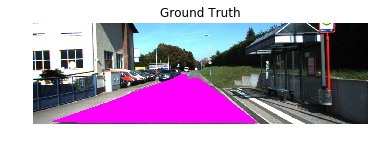

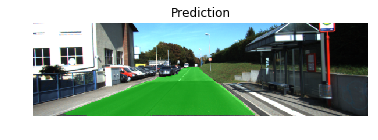

In [7]:
img = cv2.imread('data/data_road/testing/image_2/um_000013.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

label = cv2.imread('data/data_road/training/gt_image_2/um_road_000013.png')
label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(gray, 76, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(img, img, mask = mask_inv)
# label = only_road(label)
img2_bg = cv2.bitwise_and(label, label, mask = mask)

img_overlay = cv2.add(img1_bg, img2_bg)

prediction = cv2.imread('runs/1505138287.9522767/um_000013.png')
prediction = cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)

show_image(img, 'Original')
show_image(img_overlay, 'Ground Truth')
show_image(prediction, 'Prediction')

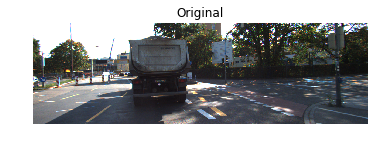

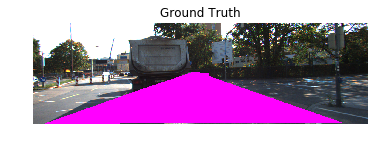

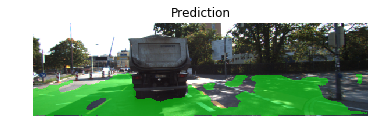

In [8]:
img = cv2.imread('data/data_road/testing/image_2/umm_000075.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

label = cv2.imread('data/data_road/training/gt_image_2/umm_road_000075.png')
label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(gray, 76, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(img, img, mask = mask_inv)
# label = only_road(label)
img2_bg = cv2.bitwise_and(label, label, mask = mask)

img_overlay = cv2.add(img1_bg, img2_bg)

prediction = cv2.imread('runs/1505138287.9522767/umm_000075.png')
prediction = cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)

show_image(img, 'Original')
show_image(img_overlay, 'Ground Truth')
show_image(prediction, 'Prediction')

### Restore the Model

In [9]:
!tree model/

model/
├── checkpoint
├── model_01.ckpt.data-00000-of-00001
├── model_01.ckpt.index
├── model_01.ckpt.meta
├── model_01.meta
├── model_01.pb
├── model_02.ckpt.data-00000-of-00001
├── model_02.ckpt.index
├── model_02.ckpt.meta
├── model_02.meta
├── model_02.pb
├── model_03.ckpt.data-00000-of-00001
├── model_03.ckpt.index
├── model_03.ckpt.meta
├── model_03.meta
└── model_03.pb

0 directories, 16 files


In [11]:
!ls model/

checkpoint			   model_02.ckpt.meta
model_01.ckpt.data-00000-of-00001  model_02.meta
model_01.ckpt.index		   model_02.pb
model_01.ckpt.meta		   model_03.ckpt.data-00000-of-00001
model_01.meta			   model_03.ckpt.index
model_01.pb			   model_03.ckpt.meta
model_02.ckpt.data-00000-of-00001  model_03.meta
model_02.ckpt.index		   model_03.pb


In [12]:
sess = tf.Session()

In [15]:
# Create the network
saver = tf.train.import_meta_graph('model/model_03.meta')

# Load the parameters
saver.restore(sess, tf.train.latest_checkpoint('model/'))

INFO:tensorflow:Restoring parameters from model/model_03.ckpt


In [16]:
# Find layers names
operations = sess.graph.get_operations()

In [18]:
for i, op in enumerate(operations):
    print(op.name)
    if i > 10:
        break

image_input
keep_prob
Processing/split/split_dim
Processing/split
Processing/sub/y
Processing/sub
Processing/sub_1/y
Processing/sub_1
Processing/sub_2/y
Processing/sub_2
Processing/concat/axis
Processing/concat


In [6]:
graph = tf.get_default_graph()

In [7]:
logits_name = 'Reshape_2:0'

In [8]:
logits = graph.get_tensor_by_name(logits_name)

In [9]:
keep_prob_name = 'keep_prob:0'
keep_prob = graph.get_tensor_by_name(keep_prob_name)

In [10]:
image_input_name = 'image_input:0'
image_input = graph.get_tensor_by_name(image_input_name)

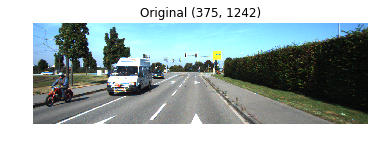

In [13]:
image = cv2.imread('data/data_road/testing/image_2/umm_000041.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image(image, 'Original (%d, %d)' % (image.shape[:2]))

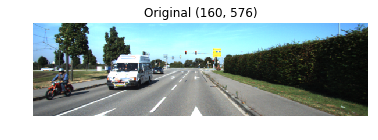

In [11]:
image_shape = (160, 576)
image_file = 'data/data_road/testing/image_2/umm_000041.png'
image = scipy.misc.imresize(scipy.misc.imread(image_file), 
                            image_shape)
show_image(image, 'Original (%d, %d)' % (image.shape[:2]))

In [43]:
im_softmax = sess.run(
    [tf.nn.softmax(logits)],
    {keep_prob: 1.0, image_input: [image]})

im_softmax = im_softmax[0][:, 1].reshape(image_shape[0],
                                         image_shape[1])

segmentation = (im_softmax > 0.5).reshape(image_shape[0],
                                          image_shape[1], 1)

mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
mask = scipy.misc.toimage(mask, mode="RGBA")

street_im = scipy.misc.toimage(image)
street_im.paste(mask, box=None, mask=mask)

In [42]:
mask.shape

(160, 576, 4)

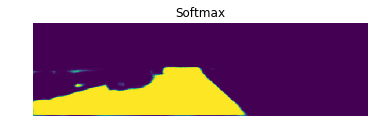

In [28]:
show_image(im_softmax, 'Softmax')

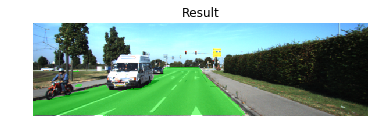

In [71]:
show_image(street_im, 'Result')

### Process Video

In [14]:
def process_frame(image):
    # global i
    try:
        frame = process_image(image)
    except Exception as e:
        frame = image
        print(e)
    finally:
        # cv2.imwrite('frames/{}-picture-frame.jpg'.format(i), 
        #            cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        # i += 1
        return frame

In [16]:
def process_image(image):
    image_shape = (160, 576)
    image_in = scipy.misc.imresize(image, image_shape)

    im_softmax = sess.run(
        [tf.nn.softmax(logits)],
        {keep_prob: 1.0, image_input: [image_in]})

    im_softmax = im_softmax[0][:, 1].reshape(image_shape[0],
                                             image_shape[1])

    segmentation = (im_softmax > 0.5).reshape(image_shape[0],
                                              image_shape[1], 1)

    mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
    mask = scipy.misc.toimage(mask, mode="RGBA")
    mask = scipy.misc.imresize(mask, (324, 576), interp='nearest')
    mask = scipy.misc.toimage(mask, mode="RGBA")

    street_im = scipy.misc.imresize(image, (324, 576))    
    street_im = scipy.misc.toimage(street_im)
    street_im.paste(mask, box=None, mask=mask)
    
    return np.array(street_im)

In [1]:
%%time

# video_output = 'videos/route_A.mp4'
# clip = VideoFileClip('videos/route_A_dashcam.mp4')
# white_clip = clip.fl_image(process_frame)
# white_clip.write_videofile(video_output, audio=False)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.62 µs


#### Video processing times

```
videos/2016_1222_161509_843.MOV
[MoviePy] Done.
[MoviePy] >>>> Video ready: videos/route_A.mp4 

CPU times: user 17min 25s, sys: 1min 9s, total: 18min 35s
Wall time: 19min 47s
```

```
videos/2016_1222_161209_842.MOV
[MoviePy] Done.
[MoviePy] >>>> Video ready: videos/route_B.mp4 

CPU times: user 21min 37s, sys: 1min 19s, total: 22min 57s
Wall time: 22min 35s
```

```
videos/2016_1222_160909_841.MOV
[MoviePy] Done.
[MoviePy] >>>> Video ready: videos/route_C.mp4 

CPU times: user 26min 20s, sys: 1min 15s, total: 27min 35s
Wall time: 27min 47s
```

In [72]:
# sess.close()

### References

- http://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/